# Conceptual Problem

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
- Bagging adalah Bootstrap AGGgregating. Karena menggabungkan Bootstrapping dan Agregasi untuk membentuk satu model ansambel, dan jadilah Bagging. Cara Kerja dalam Bagging, beberapa model dilatih secara independen pada sekumpulan subset data pelatihan yang berbeda, sering kali diperoleh melalui bootstrapping. Prediksi dari masing-masing model kemudian digabungkan, biasanya dengan membuat rata-rata untuk tugas regresi atau berdasarkan mayoritas untuk Classification.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
- Random Forest adalah jenis algoritma ensemble learning yang terdiri dari banyak pohon keputusan (decision trees). cara kerja dalam Random Forest dibangun secara independen dengan menggunakan subset dari data pelatihan dan subset dari fitur secara acak.
- XGBoost secara efektif menggunakan metode boosting untuk meningkatkan model secara bertahap mengelola overfitting melalui teknik regularisasi seperti penalti pada kompleksitas model, sedangkan Random Forest umumnya kurang cenderung overfitting karena menggunakan subset acak fitur.

3. Jelaskan apa yang dimaksud dengan Cross Validation !
- Cross Validation adalah teknik evaluasi model yang digunakan untuk menilai kinerja model machine learning dan memastikan bahwa model tidak overfitting atau underfitting. Teknik ini membagi dataset menjadi beberapa subset (atau "folds") dan menjalankan serangkaian training dan testing yang berbeda untuk mendapatkan evaluasi yang lebih akurat dan umum tentang kinerja model.

# I. Perkenalan


Phase 1 Milestone 2

Nama  : Bagus Adji Kusuma
Batch : RMT-032


Program ini dibuat guna mengevaluasi konsep Machine Learning pada pembelajaran Phase 1 dalam model supervised learning. menerapkan Classification dengan Dataset yang dipilih adalah high_diamond_ranked_10min, disini saya akan mengevaluasi pada salah satu Game League Legends dengan tipe game multiplayer Online Battle Arena(MOBA). Dalam 10 menit pertama statistik awal game pada salah satu tier/peringkatnya yaitu Diamond Rank, dengan tujuan membantu Developers Game 'RIOT' untuk mengimprove Arena Battle yang lebih seimbang antara Blue team dan Red Team, dimana kemenangan antara 2 tim ini mempengaruhi skema permainan yang seharusnya bisa lebih seimbang antara kemampuan antara player 1 dan yang lainnya. dengan mengambil pov game dari Blue Team dengan 1 game berisi 10, blue team 5 player begitu juga read team.

# II. Import Libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
import numpy as np
import json
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr,kendalltau
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score

# III. Data Loading

In [3]:
!pip install feature_engine

In [4]:
df=pd.read_csv('high_diamond_ranked_10min.csv',nrows=3000)
#menampilkan 10 baris awal
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [5]:
# Melihat informasi keseluruhan dari mulai tipe data apa saja, jumlah data yang hilang, 
# berapa banyak kolom yang tampil dan berapa row yang ada 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        3000 non-null   int64  
 1   blueWins                      3000 non-null   int64  
 2   blueWardsPlaced               3000 non-null   int64  
 3   blueWardsDestroyed            3000 non-null   int64  
 4   blueFirstBlood                3000 non-null   int64  
 5   blueKills                     3000 non-null   int64  
 6   blueDeaths                    3000 non-null   int64  
 7   blueAssists                   3000 non-null   int64  
 8   blueEliteMonsters             3000 non-null   int64  
 9   blueDragons                   3000 non-null   int64  
 10  blueHeralds                   3000 non-null   int64  
 11  blueTowersDestroyed           3000 non-null   int64  
 12  blueTotalGold                 3000 non-null   int64  
 13  blu

- Pada dataset ini terdapat 40 kolom dengan masing-masing data terdiri dari 6 kolom bertipe float, 34 bertipe integer 
- dari sini tidak terlihat ada missing value dari dataset

In [6]:
# Mengecek data yang hilang
null = df.isnull().sum()

In [7]:
# Mengecek data yang duplikat
duplicates = df.duplicated().sum()
duplicates


0

In [8]:
#mengecek penamaan Kolom secara default
print(df.columns)

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


- Karena dalam Dataset ini menampilkan semua Point of view dari kedua tim, dan objektif utamanya hanya menganalisa melakukan pemodelan hingga evaluasi pada blue team saja maka dalam kasus ini akan dilakukan drop kolom pada Red Team

In [9]:
# asumsi Daftar kolom yang tidak memiliki korelasi dan dihapus
no_corr_cols = ['redWardsPlaced','redWardsDestroyed','redFirstBlood',
 'redKills', 'redTotalJungleMinionsKilled',
 'redGoldDiff','redExperienceDiff','redCSPerMin',
 'redGoldPerMin','redDeaths','redAssists',
 'redEliteMonsters','redDragons','redTowersDestroyed',
 'redTotalGold','redAvgLevel','redTotalExperience',
 'redTotalMinionsKilled','redHeralds']
# Menghapus kolom yang tidak memiliki korelasi
df = df.drop(columns=no_corr_cols)

In [10]:
# Melihat informasi keseluruhan dari mulai tipe data apa saja, jumlah data yang hilang, 
# berapa banyak kolom yang tampil dan berapa row yang ada 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        3000 non-null   int64  
 1   blueWins                      3000 non-null   int64  
 2   blueWardsPlaced               3000 non-null   int64  
 3   blueWardsDestroyed            3000 non-null   int64  
 4   blueFirstBlood                3000 non-null   int64  
 5   blueKills                     3000 non-null   int64  
 6   blueDeaths                    3000 non-null   int64  
 7   blueAssists                   3000 non-null   int64  
 8   blueEliteMonsters             3000 non-null   int64  
 9   blueDragons                   3000 non-null   int64  
 10  blueHeralds                   3000 non-null   int64  
 11  blueTowersDestroyed           3000 non-null   int64  
 12  blueTotalGold                 3000 non-null   int64  
 13  blu

Kolom sudah siap digunakan dengan total 21 kolom, tipe data float hanya 3 dan dengan tipe data int hanya 18. dengan total 3000 entries data 

# IV. Exploratory Data Analysis (EDA)

In [11]:
# Melihat statistik deskriptif dari variabel-variabel numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,3000.0,4.498471e+09,2.747970e+07,4.378269e+09,4.480374e+09,4.509938e+09,4.520943e+09,4.525381e+09
blueWins,3000.0,4.893333e-01,4.999695e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blueWardsPlaced,3000.0,2.174533e+01,1.712944e+01,5.000000e+00,1.400000e+01,1.600000e+01,2.000000e+01,1.650000e+02
blueWardsDestroyed,3000.0,2.835667e+00,2.180576e+00,0.000000e+00,1.750000e+00,3.000000e+00,4.000000e+00,2.400000e+01
blueFirstBlood,3000.0,4.966667e-01,5.000722e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blueKills,3000.0,6.166333e+00,2.978303e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,1.800000e+01
blueDeaths,3000.0,6.150667e+00,2.903924e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,1.800000e+01
blueAssists,3000.0,6.686667e+00,4.086733e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,2.900000e+01
blueEliteMonsters,3000.0,5.463333e-01,6.319174e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
blueDragons,3000.0,3.550000e-01,4.785931e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [12]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,4523371949,0,12,1,0,5,5,5,0,0,...,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [13]:
df.blueWardsPlaced.unique().tolist()

[28,
 12,
 15,
 43,
 75,
 18,
 16,
 13,
 20,
 33,
 14,
 17,
 21,
 11,
 78,
 19,
 105,
 22,
 40,
 24,
 36,
 41,
 37,
 29,
 122,
 52,
 32,
 50,
 83,
 30,
 38,
 87,
 23,
 70,
 10,
 91,
 54,
 35,
 86,
 25,
 42,
 68,
 124,
 34,
 31,
 44,
 27,
 57,
 39,
 56,
 46,
 53,
 85,
 76,
 48,
 143,
 97,
 51,
 146,
 88,
 62,
 94,
 81,
 9,
 72,
 60,
 26,
 63,
 55,
 65,
 59,
 149,
 67,
 80,
 104,
 47,
 123,
 73,
 84,
 45,
 82,
 156,
 165,
 69,
 108,
 49,
 8,
 141,
 111,
 58,
 5,
 102,
 128,
 90,
 74,
 77,
 95,
 64,
 117,
 127,
 129,
 138,
 164,
 110,
 93,
 89,
 148]

In [14]:
#mengecek penamaan Kolom secara default
print(df.columns)

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin'],
      dtype='object')


c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


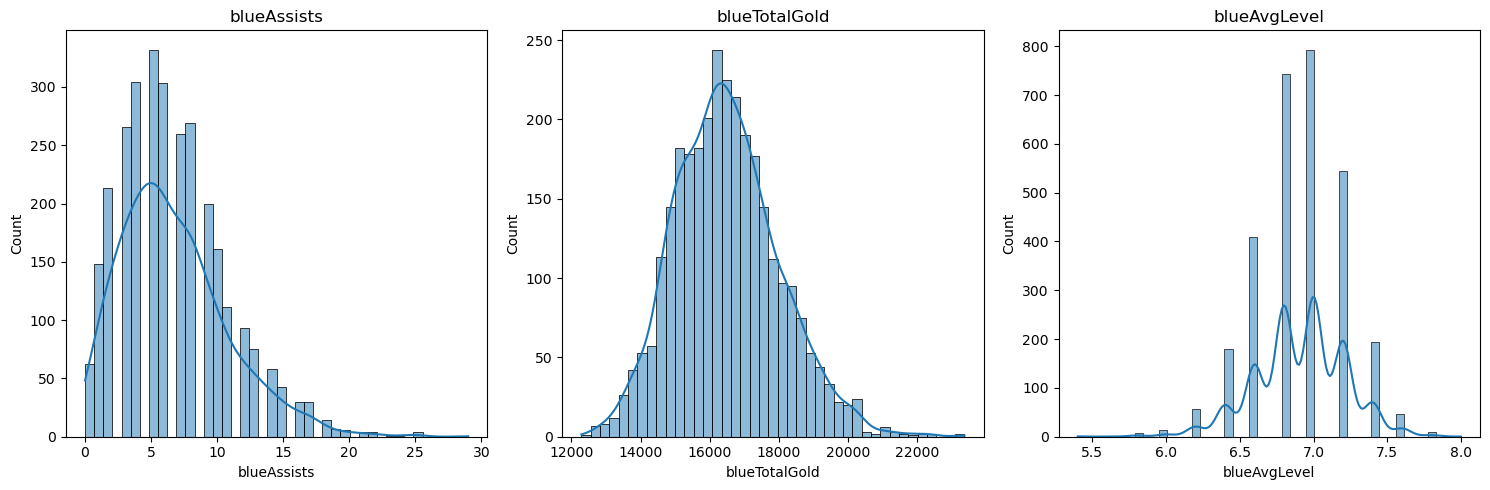

In [15]:
#Melihat distribusi tiap kolom

# buat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms dgn KDE
for i, column in enumerate(['blueAssists',
       'blueTotalGold', 'blueAvgLevel']):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

# Display plot
plt.tight_layout() # secara otomatis mengoptimalkan ruang di antara subplot agar tidak ada tumpang tindih
plt.show()

- Insight : 

1. Rentang Assist dalam setiap game bervariasi, dimulai dari 0 hingga 29 assist terbanyak yang di dapatkan dalam setiap Game nya. dan assist terbanyak sering didapatkan sekitar 5-6 Assist.

2. Bluetotalgold dalam setiap game juga beragam, dari total gold yang didapat dari sekitar 12500 hingga mencapai 23000 dan sedikit dari Bluetotalgold yang mencapai angka 23000 terbanyak.

3. Setelah dihitung blueAvgLevel didapatkan avg level dari setiap game yang sudah diselesaikan selama 10menit pertama dan yang terbanyak ada pada level 7.0 

c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


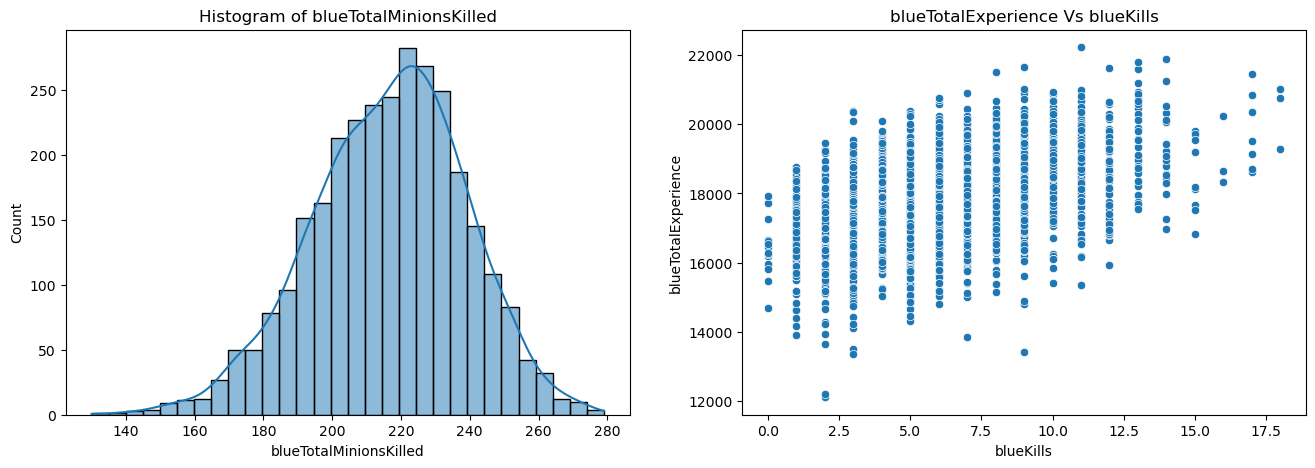

c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


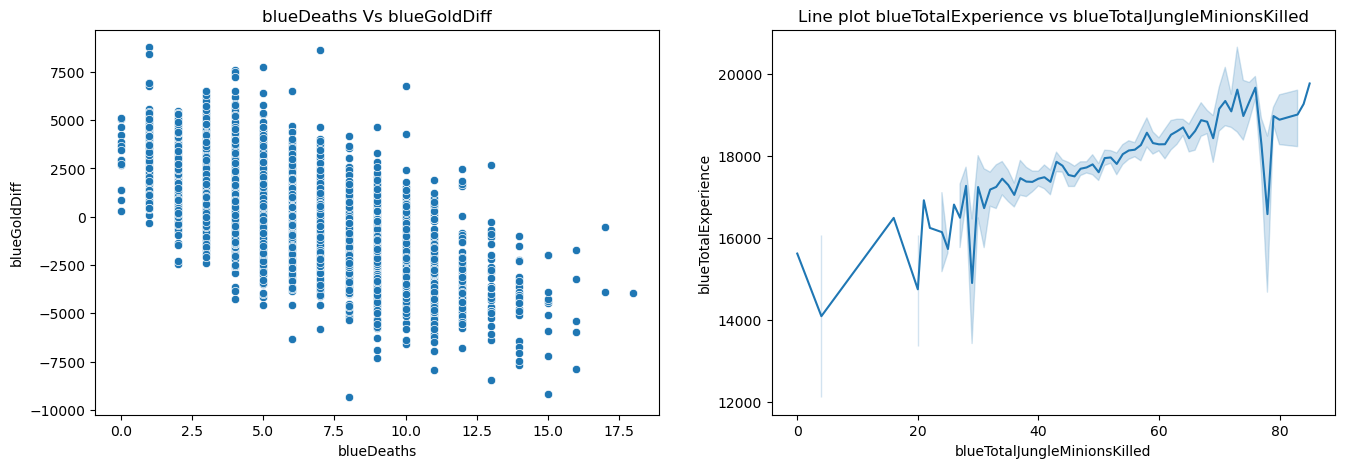

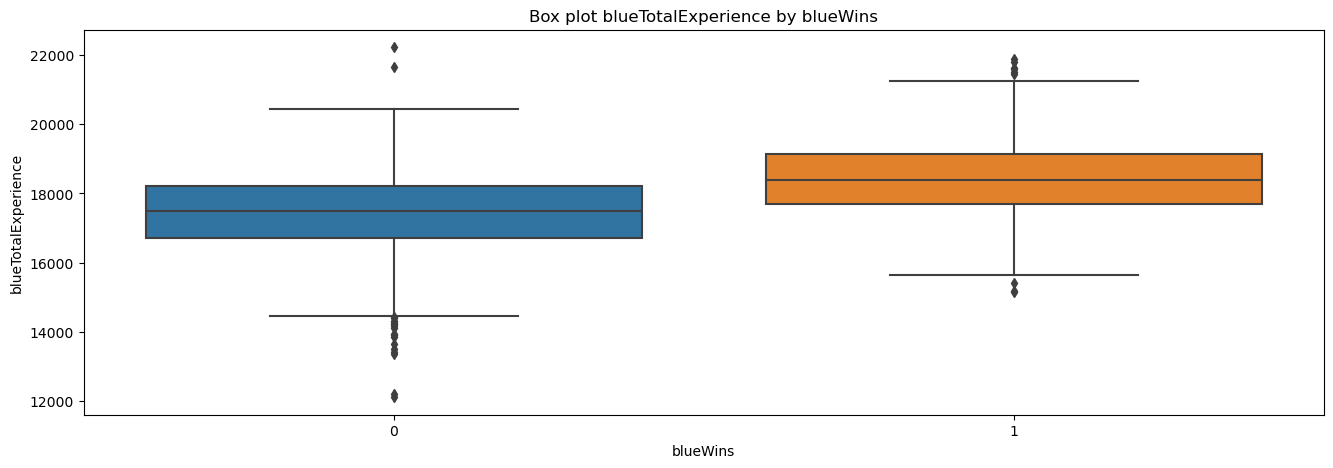

In [16]:
# Create Histogram and Scatter plot

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(df['blueTotalMinionsKilled'], kde = True, bins = 30)
plt.title('Histogram of blueTotalMinionsKilled')

plt.subplot(1,2,2)
sns.scatterplot(x = 'blueKills', y = 'blueTotalExperience', data= df)
plt.title('blueTotalExperience Vs blueKills')
plt.show()

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.scatterplot(x = 'blueDeaths', y = 'blueGoldDiff', data= df)
plt.title('blueDeaths Vs blueGoldDiff')

#  Line plot 'day' vs 'price'
plt.subplot(1, 2, 2)
sns.lineplot(x='blueTotalJungleMinionsKilled', y='blueTotalExperience', data=df)
plt.title('Line plot blueTotalExperience vs blueTotalJungleMinionsKilled')

plt.show()

plt.figure(figsize=(16,5))
sns.boxplot(x='blueWins', y='blueTotalExperience', data=df)
plt.title('Box plot blueTotalExperience by blueWins')
plt.show()

- Insight :

1. Menampilkan distribusi berupa histogram dari blueTotalMinionsKilled pada setiap game yang mana, sebagian besar berada di bawah 250 dengan puncak sekitar 230. Nilai tertinggi mencapai 280 blueTotalMinionsKilled, menunjukkan bahwa ada beberapa Player bisa mengeleminasi minions dengan sangat baik dan memanfaatkan itu untuk kemajuan team fight nya. yang arti nya kebanyakan dari mereka lebih suka meninggalkan lane mereka sendiri untuk teamfight atau membantu role yang lain dalam menghadapi player lain.

2. Dalam hal ini yang ditampilkan scatter plot yaitu distribusi hubungan antara blueTotalExperience atau Exp total yang didapatkan saat game selesai, dengan blueKills atau eleminasi Champions terhadap team lawan Red Team , terlihat adanya kenaikan dari kills setiap kali total exp nya bertambah dan ini bisa di bilang bagus karena memanfaatkan total exp yang didapat sehingga bisa meningkatkan kills yang didapat juga.

3. Menampilkan hubungan antara bluedeath dalam setiap permainan total deaths dari setiap pemain, dan blueGoldDiff yang menunjukan differensiasi antara Gold yang didapat dengan team red atau team lawan.dengan sebaran data yang ditampilkan Sebagian besar Player mendapati perbedaan yang cukup signifikan ke bawah karena Deaths yang di dapat terlalu banyak sehingga blueGoldDiff berkurang di setiap gamenya walaupun tetap sebaran nya bervariasi. Terdapat Outliers menunjukan ada juga di setiap game nya yang memiliki bluedeath yang banyak tetapi didapati blueGoldDiff yang tidak cukup signifikan kebawah. mungkin dalam hal ini mengindikasikan ada beberapa permainan juga yang melewati masa kesulitan dengan Deaths yang banyak atau sekitar 17bluedeath tetapi bisa mengejar blueGoldDiff seminimal mungkin.

4. Garis LIne Plot yang ditampilkan menunjukkan bahwa blueTotalExperience cenderung meningkat seiring bertambahnya blueTotalJungleMinionsKilled atau kill minion/creep dalam role Jungle. Dalam hal Ini mengindikasikan bahwa disetiap permainan jika role jungle tersebut bisa memainkan role nya dengan baik seperti mendapatkan TotalJungleMinionsKilled maka Exp yang di dapat dalam blue team akan meningkat dan bisa membawa Blue Team ke arah kemenangan.

5. blueWins atau kemenangan dari blue team , yang ditampilkan pada boxplot terdapat perbedaan yang tidak signifikan tetapi pada blueWins didapati kemenangan yang lebih tinggi karena blueTotalExperience atau exp total game yang didapat. Dalam hal ini didapati sedikit Outliers dalam nilai 0 pada blueWins ini perlu di lakukan handling terlebih dahulu untuk mendapatkan hasil yang lebih baik.

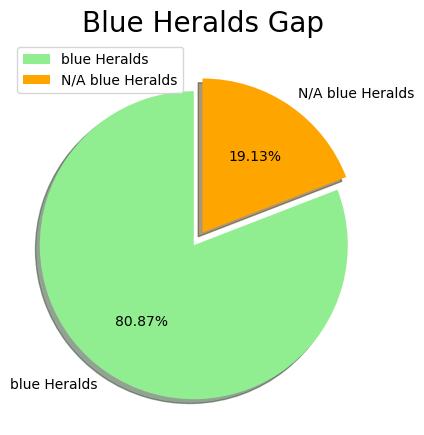

In [17]:
#Melihat presentase blueHeralds pada data

labels = ['blue Heralds', 'N/A blue Heralds']
size = df['blueHeralds'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0.1, 0]

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Blue Heralds Gap', fontsize = 20)
plt.legend()
plt.show()

- Insight :

Terlihat bahwa Blue Team memperoleh lebih banyak Blue Herrald 

In [18]:
df['blueWins'].value_counts()

blueWins
0    1532
1    1468
Name: count, dtype: int64

Melihat kolom target apakah imbalance atau tidak

# V. Feature Engineering

Pada tahap ini berisi proses penyiapan data untuk proses pelatihan model

In [19]:
df.blueTowersDestroyed.unique().tolist()

[0, 1, 2, 3]

In [20]:
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,4523371949,0,12,1,0,5,5,5,0,0,...,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15899,7.0,18161,225,42,698,101,22.5,1589.9
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7


#### Handling Cardinal

In [21]:
pd.set_option('display.max_colwidth', None)

cat_cols = ['blueWins', 'blueFirstBlood','blueEliteMonsters','blueDragons','blueHeralds', ]

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['Nama kolom', 'Jumlah nilai unique', 'Nilai unique'], data=listItem)

,Nama kolom,Jumlah nilai unique,Nilai unique
0,blueWins,2,"[0, 1]"
1,blueFirstBlood,2,"[1, 0]"
2,blueEliteMonsters,3,"[0, 1, 2]"
3,blueDragons,2,"[0, 1]"
4,blueHeralds,2,"[0, 1]"


Cardinality check :

Dalam fitur ini sudah bisa dilihat mana saja kolom yang kategorikal yang sudah ter encode, semua data sudah siap karena sudah di encode. 
- tidak ada action yang diperlukan dalam kolom kategorikal yang ini karena tidak ada yang high cardinality

#### Split beetwen X (Features) and Y (Target)

In [22]:
#Splitting between 'X' and 'y'

X = df.drop(['blueWins'], axis = 1)
y = df['blueWins']
X

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,4523371949,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,4436033771,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4518182783,16,1,0,5,6,6,1,0,1,0,14853,6.4,16170,174,48,-2673,-1867,17.4,1485.3
2996,4491522681,14,2,0,3,4,2,0,0,0,0,15369,7.0,17785,221,57,-482,-349,22.1,1536.9
2997,4523403818,20,6,1,6,8,7,0,0,0,0,17053,7.0,18362,219,46,-298,0,21.9,1705.3
2998,4510862255,21,0,1,11,9,10,1,1,0,0,17307,6.6,16527,161,42,-224,-765,16.1,1730.7


#### Splitting between Train-Set and Test-set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (2400, 20)
Test Size:  (600, 20)


In [24]:
X_train.drop(['gameId'], axis=1, inplace=True)

In [25]:
X_test.drop(['gameId'], axis=1, inplace=True)

In [26]:
X_train.columns, X_test.columns

(Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
        'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
        'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
        'blueTotalExperience', 'blueTotalMinionsKilled',
        'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
        'blueCSPerMin', 'blueGoldPerMin'],
       dtype='object'),
 Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
        'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
        'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
        'blueTotalExperience', 'blueTotalMinionsKilled',
        'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
        'blueCSPerMin', 'blueGoldPerMin'],
       dtype='object'))

Karena ini hanya game ID dari setiap game yang sudah selesai maka bisa di asumsikan ini tidak akan diperlukan untuk prediksi nya

#### Handling Missing Value

Akan check dalam setiap train test dalam fitur maupun target apakah terdapat nilai yang hilang.

In [27]:
X_train.isnull().sum()

blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
dtype: int64

In [28]:
X_test.isnull().sum()

blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
dtype: int64

In [29]:
y_train.isnull().sum()

0

In [30]:
y_test.isnull().sum()

0

Data tidak ada yang missing value maka biosa dilanjutkan ke proses future engineering selanjutnya.

#### Handling Outliers

In [31]:
#hanya digunakan untuk copy paste saja untuk melihat nilai skeww nya
print(X.columns)

Index(['gameId', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin'],
      dtype='object')


In [32]:
num_cols = [ 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)

,nama kolom,nilai skewness
0,blueWardsPlaced,4.084856
1,blueWardsDestroyed,2.637663
2,blueKills,0.524340
3,blueDeaths,0.465727
4,blueAssists,0.947933
5,blueTowersDestroyed,5.963968
6,blueTotalGold,0.456506
7,blueAvgLevel,-0.315917
8,blueTotalExperience,-0.195092
9,blueTotalMinionsKilled,-0.292480


Beberapa  data cenderung memiliki ekor yang lebih panjang di sebelah kanan dengan nilai-nilai yang lebih tinggi. Seperti blueWardsPlaced 4.084856, blueWardsDestroyed 2.637663,blueTowersDestroyed 5.963968. 

- Dan Kolom seperti blueDeaths, blueGoldDiff, blueExperienceDiff, dan blueCSPerMin memiliki skewness yang mendekati nol. Ini menunjukkan bahwa distribusi data cenderung lebih simetris atau mendekati distribusi normal 

- perlu di perhatikan bahwa kolom yang sudah disebutkan nilai skewness yang extrem oleh karena itu perlu dilakukan handling outliers, Maka bisa dilanjutkan handling outliers guna meminimalisir outliersnya agar mendapatkan pemodelan yang lebih baik lagi

- ouliers akan di handling menggunakan modul winsorizer di lanjutkan pada pipeline yang akan dibuat

#### Split Between Numeric Columns and Categorical Columns

In [33]:
# Get Numerical Columns and Categorical Columns

num_columns = ['blueWardsPlaced', 'blueWardsDestroyed',
               'blueKills', 'blueDeaths', 'blueAssists', 'blueTowersDestroyed',
               'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience',
               'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
               'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin']

cat_columns = ['blueFirstBlood', 'blueEliteMonsters', 'blueDragons', 'blueHeralds']

# Memilih kolom-kolom dari X_train
num_capped_columns_train = X_train[num_columns]
cat_capped_columns_train = X_train[cat_columns]


print('Numerical Columns : ', num_capped_columns_train.columns.tolist())
print('Categorical Columns : ', cat_capped_columns_train.columns.tolist())

Numerical Columns :  ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin']
Categorical Columns :  ['blueFirstBlood', 'blueEliteMonsters', 'blueDragons', 'blueHeralds']


In [34]:
# Split numerical columns and categorical columns

X_train_num = num_capped_columns_train[num_columns]
X_train_cat = cat_capped_columns_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_cat

,blueFirstBlood,blueEliteMonsters,blueDragons,blueHeralds
1299,0,0,0,0
1588,0,1,0,1
2094,1,0,0,0
1220,0,1,1,0
1097,1,0,0,0
...,...,...,...,...
1863,1,0,0,0
1330,1,0,0,0
2213,1,1,1,0
2055,1,1,1,0


#### Feature Selection

Feature selection bisa dilakukan setelah split, dengan catatan jika menggunakan fit wajib setelah

In [35]:
# Feature selection cat columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,blueFirstBlood,ada korelasi
1,blueEliteMonsters,ada korelasi
2,blueDragons,ada korelasi
3,blueHeralds,ada korelasi


In [36]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,blueWardsPlaced,ga ada korelasi
1,blueWardsDestroyed,ga ada korelasi
2,blueKills,ada korelasi
3,blueDeaths,ada korelasi
4,blueAssists,ada korelasi
5,blueTowersDestroyed,ada korelasi
6,blueTotalGold,ada korelasi
7,blueAvgLevel,ada korelasi
8,blueTotalExperience,ada korelasi
9,blueTotalMinionsKilled,ada korelasi


#### Column Transformer

In [37]:
# #Making column transformer for preprocessing
# transformer = ColumnTransformer([
# ('gaussian', Winsorizer(capping_method='gaussian', tail='both', fold=3), selector(dtype_exclude='object')),
# ('scaler', MinMaxScaler(), selector(dtype_include=['int', 'float']))  # Menggunakan int dan float,
# ('encoding', OneHotEncoder(), selector(dtype_include='object'))
# ])


In [38]:
num_pipe=Pipeline([
    # ('iqr_outliers', Winsorizer(capping_method='iqr', tail='both', fold=3)),
    ('gaussian', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

In [39]:
# 'passthrough' akan mempertahankan kolom kategorikal tanpa perubahan
prep_data = ColumnTransformer([
    ('cat', 'passthrough', cat_columns), 
    ('num', num_pipe, num_columns)

])

# VI. Model Definition

#### Pipeline model

In [40]:


#Making pipeline for Decision Tree
pipe_dt = Pipeline([
    ('prep1', prep_data),
    ('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
    ('prep2', prep_data),
    ('classifier', RandomForestClassifier())
])

pipe_logreg = Pipeline([
    ('prep3', prep_data),
    ('classifier', LogisticRegression())
])

# Pipeline untuk SVM
pipe_svm = Pipeline([
    ('prep4', prep_data),
    ('classifier', SVC())
])

# Pipeline untuk KNN
pipe_knn = Pipeline([
    ('prep5', prep_data),
    ('classifier', KNeighborsClassifier())
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
('prep6', prep_data),
('classifier', XGBClassifier())
])

In [41]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('prep6',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['blueFirstBlood',
                                                   'blueEliteMonsters',
                                                   'blueDragons',
                                                   'blueHeralds']),
                                                 ('num',
                                                  Pipeline(steps=[('gaussian',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['blueWardsPlaced',
                                                   'blueWardsDestroyed',
                                                   'blueKills', 'blueDeaths',
                                                   'blueAssis...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# VII. Model Training

In [42]:
# pipe_rf.fit(X_train, y_train)

In [43]:
# Fit pipeline untuk model random forest
pipe_rf.fit(X_train, y_train)
print('Training Score rf: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score rf: ', round(pipe_rf.score(X_test, y_test),4))
# Fit pipeline untuk model decision tree
pipe_dt.fit(X_train, y_train)
print('Training Score dt: ', round(pipe_dt.score(X_train, y_train), 4))
print('Testing Score dt: ', round(pipe_dt.score(X_test, y_test), 4))

pipe_logreg.fit(X_train, y_train)
print('Training Score logreg: ', round(pipe_logreg.score(X_train, y_train), 4))
print('Testing Score logreg: ', round(pipe_logreg.score(X_test, y_test), 4))

pipe_svm.fit(X_train, y_train)
print('Training Score svm: ', round(pipe_svm.score(X_train, y_train), 4))
print('Testing Score svm: ', round(pipe_svm.score(X_test, y_test), 4))

pipe_knn.fit(X_train, y_train)
print('Training Score knn: ', round(pipe_knn.score(X_train, y_train), 4))
print('Testing Score knn: ', round(pipe_knn.score(X_test, y_test), 4))

pipe_xgb.fit(X_train, y_train)
print('Training Score xgb: ', round(pipe_xgb.score(X_train, y_train), 4))
print('Testing Score xgb: ', round(pipe_xgb.score(X_test, y_test), 4))

Training Score rf:  1.0
Testing Score rf:  0.6717
Training Score dt:  1.0
Testing Score dt:  0.6267
Training Score logreg:  0.735
Testing Score logreg:  0.7167
Training Score svm:  0.7621
Testing Score svm:  0.715
Training Score knn:  0.7875
Testing Score knn:  0.65
Training Score xgb:  1.0
Testing Score xgb:  0.675


Terlihat semua pemodelan masih belum fit sehingga hyperparameter tuning perlu dilakukan untuk mendapatkan nilai distribusi yang normal

In [44]:
# List of pipelines for ease of iteration
pipelines = [
    ('Decision Tree', pipe_dt),
    ('Random Forest', pipe_rf),
    ('Logistic Regression', pipe_logreg),
    ('SVM', pipe_svm),
    ('KNN', pipe_knn),
    ('XGBoost', pipe_xgb)
]

# Dictionary untuk menyimpan hasil evaluasi
results = {'Model': [], 'F1-score Mean cross val': [], 'F1-score Std cross val': [], 'Accuracy Mean cross val': [], 'Accuracy Std cross val': []}

# Loop untuk melakukan cross-validation dan menyimpan hasilnya
for model_name, pipe in pipelines:
    # Lakukan cross-validation dengan scoring f1-score macro dan accuracy
    scoring = ['f1_macro', 'accuracy']
    scores = cross_validate(pipe, X, y, cv=5, scoring=scoring, return_train_score=False)
    
    # Simpan nilai rata-rata dan standar deviasi dari f1-score dan accuracy
    mean_f1_score = scores['test_f1_macro'].mean()
    std_f1_score = scores['test_f1_macro'].std()
    mean_accuracy = scores['test_accuracy'].mean()
    std_accuracy = scores['test_accuracy'].std()
    
    # Tambahkan ke dictionary results
    results['Model'].append(model_name)
    results['F1-score Mean cross val'].append(mean_f1_score)
    results['F1-score Std cross val'].append(std_f1_score)
    results['Accuracy Mean cross val'].append(mean_accuracy)
    results['Accuracy Std cross val'].append(std_accuracy)

# Buat DataFrame dari dictionary results
results_df = pd.DataFrame(results)

# Tampilkan DataFrame dalam bentuk transpose
results_transposed = results_df.T
print(results_transposed)

                                     0              1                    2  \
Model                    Decision Tree  Random Forest  Logistic Regression   
F1-score Mean cross val       0.631553       0.711133             0.732314   
F1-score Std cross val        0.023423        0.01774             0.028258   
Accuracy Mean cross val          0.632       0.711333             0.732667   
Accuracy Std cross val        0.023603       0.017714             0.028217   

                                3         4         5  
Model                         SVM       KNN   XGBoost  
F1-score Mean cross val  0.724652  0.675635  0.682635  
F1-score Std cross val   0.017452  0.015442   0.02149  
Accuracy Mean cross val     0.725  0.676333     0.683  
Accuracy Std cross val   0.017416   0.01572  0.021536  


- Pipeline untuk setiap algoritma (Decision Tree, Random Forest, Logistic Regression, SVM, KNN, XGBoost) dengan menggunakan parameter default dengan nilai performansi mean dan std dari setiap model menggunakan cross val.

In [45]:
# target = ['Neutral or Dissatisfied', 'Satisfied']
# print(classification_report(y_test, y_rf_pred, target_names = target))

#### Hyperparameter Tuning

In [46]:
# Parameter grid untuk Random forest
param_rf = {
    'classifier__n_estimators' : np.arange(200, 400, 100),
    'classifier__max_depth' : np.arange(4,8,2)
}

# Parameter grid untuk decission tree
param_dt = {
    'classifier__max_depth' : np.arange(4,8,2),
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [0.1, 1, 2, 4]
}

param_logreg = {
    'classifier__penalty': ['l2'],
    'classifier__C': [0.1, 1, 10]
    

}

# Parameter grid untuk KNN
param_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 16, 17, 18, 19, 20, 22, 25, 27, 29],
    'classifier__p': [1, 2]
}

param_svm = {
    'classifier__C': [0.1, 1, 2, 10, 100],
    'classifier__gamma': [10, 1, 0.1, 0.01,],
    'classifier__class_weight': [None, 'balanced']
    
}

param_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 0.9, 1.0]
}

#### Random Forest

In [47]:
# Menggunakan GridSearchCV untuk Random Forest
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

In [48]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

Train Set Score :  0.755
Test Set Score :  0.7066666666666667


In [49]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 4, 'classifier__n_estimators': 200}


Pipeline(steps=[('prep2',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['blueFirstBlood',
                                                   'blueEliteMonsters',
                                                   'blueDragons',
                                                   'blueHeralds']),
                                                 ('num',
                                                  Pipeline(steps=[('gaussian',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('pca',
          

In [50]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.69      0.73      0.71       293

    accuracy                           0.71       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.71      0.71      0.71       600



In [51]:
best_pipe_rf

Pipeline(steps=[('prep2',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['blueFirstBlood',
                                                   'blueEliteMonsters',
                                                   'blueDragons',
                                                   'blueHeralds']),
                                                 ('num',
                                                  Pipeline(steps=[('gaussian',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['blueWardsPlaced',
                                                   'blueWardsDestroyed',
                                                   'blueKills', 'blueDeaths',
                                                   'blueAssists',
                                                   'blueTowersDestroyed',
                                                   'blueTotalGold',
                                                   'blueAvgLevel',
                                                   'blueTotalExperience',
                                                   'blueTotalMinionsKilled',
                                                   'blueTotalJungleMinionsKilled',
                                                   'blueGoldDiff',
                                                   'blueExperienceDiff',
                                                   'blueCSPerMin',
                                                   'blueGoldPerMin'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=4, n_estimators=200))])

#### Decission Tree

In [52]:
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5).fit(X_train, y_train)

In [53]:
print('Train Set Score : ', grid_dt.score(X_train, y_train))
print('Test Set Score : ', grid_dt.score(X_test, y_test))

Train Set Score :  0.7320833333333333
Test Set Score :  0.6833333333333333


In [54]:
best_param_dt = grid_dt.best_params_
print(best_param_dt)
print('\n')
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
print('\n')
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'classifier__max_depth': 4, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


Pipeline(steps=[('prep1',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['blueFirstBlood',
                                                   'blueEliteMonsters',
                                                   'blueDragons',
                                                   'blueHeralds']),
                                                 ('num',
                                                  Pipeline(steps=[('gaussian',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                              

In [55]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.69      0.73      0.71       293

    accuracy                           0.71       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.71      0.71      0.71       600



#### SVM

In [56]:
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=5).fit(X_train, y_train)

In [57]:
print('Train Set Score : ', grid_svm.score(X_train, y_train))
print('Test Set Score : ', grid_svm.score(X_test, y_test))

Train Set Score :  0.7391666666666666
Test Set Score :  0.7133333333333334


In [58]:
best_param_svm = grid_svm.best_params_
print(best_param_svm)
print('\n')
best_pipe_svm = grid_svm.best_estimator_
print(best_pipe_svm)
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
print(result_df_svm.columns)

{'classifier__C': 2, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.01}


Pipeline(steps=[('prep4',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['blueFirstBlood',
                                                   'blueEliteMonsters',
                                                   'blueDragons',
                                                   'blueHeralds']),
                                                 ('num',
                                                  Pipeline(steps=[('gaussian',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                          

In [59]:
print(classification_report(y_test, best_pipe_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.70      0.73      0.71       293

    accuracy                           0.71       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.71      0.71      0.71       600



In [60]:
best_pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('prep4',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['blueFirstBlood',
                                                   'blueEliteMonsters',
                                                   'blueDragons',
                                                   'blueHeralds']),
                                                 ('num',
                                                  Pipeline(steps=[('gaussian',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['blueWardsPlaced',
                                                   'blueWardsDestroyed',
                                                   'blueKills', 'blueDeaths',
                                                   'blueAssists',
                                                   'blueTowersDestroyed',
                                                   'blueTotalGold',
                                                   'blueAvgLevel',
                                                   'blueTotalExperience',
                                                   'blueTotalMinionsKilled',
                                                   'blueTotalJungleMinionsKilled',
                                                   'blueGoldDiff',
                                                   'blueExperienceDiff',
                                                   'blueCSPerMin',
                                                   'blueGoldPerMin'])])),
                ('classifier', SVC(C=2, class_weight='balanced', gamma=0.01))])

#### KNN

In [61]:
grid_knn = GridSearchCV(pipe_knn , param_knn, cv=5).fit(X_train, y_train)

In [62]:
print('Train Set Score : ', grid_knn.score(X_train, y_train))
print('Test Set Score : ', grid_knn.score(X_test, y_test))

Train Set Score :  0.7354166666666667
Test Set Score :  0.7016666666666667


In [63]:
best_param_knn = grid_knn.best_params_
print(best_param_knn)
print('\n')
best_pipe_knn = grid_knn.best_estimator_
print(best_pipe_knn)
print('\n')
result_df_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')
print(result_df_knn.columns)

{'classifier__n_neighbors': 29, 'classifier__p': 1}


Pipeline(steps=[('prep5',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['blueFirstBlood',
                                                   'blueEliteMonsters',
                                                   'blueDragons',
                                                   'blueHeralds']),
                                                 ('num',
                                                  Pipeline(steps=[('gaussian',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('pca',
                    

In [64]:
print(classification_report(y_test, best_pipe_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       307
           1       0.70      0.69      0.69       293

    accuracy                           0.70       600
   macro avg       0.70      0.70      0.70       600
weighted avg       0.70      0.70      0.70       600



#### Logistic Regression

In [65]:
grid_logreg = GridSearchCV(pipe_logreg , param_logreg, cv=5).fit(X_train, y_train)

In [66]:
print('Train Set Score : ', grid_logreg.score(X_train, y_train))
print('Test Set Score : ', grid_logreg.score(X_test, y_test))

Train Set Score :  0.7370833333333333
Test Set Score :  0.715


In [67]:
best_param_logreg = grid_logreg.best_params_
print(best_param_logreg)
print('\n')
best_pipe_logreg = grid_logreg.best_estimator_
print(best_pipe_logreg)
print('\n')
result_df_logreg = pd.DataFrame.from_dict(grid_logreg.cv_results_, orient='columns')
print(result_df_logreg.columns)

{'classifier__C': 0.1, 'classifier__penalty': 'l2'}


Pipeline(steps=[('prep3',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['blueFirstBlood',
                                                   'blueEliteMonsters',
                                                   'blueDragons',
                                                   'blueHeralds']),
                                                 ('num',
                                                  Pipeline(steps=[('gaussian',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('pca',
                    

In [68]:
print(classification_report(y_test, best_pipe_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       307
           1       0.72      0.69      0.70       293

    accuracy                           0.71       600
   macro avg       0.72      0.71      0.71       600
weighted avg       0.72      0.71      0.71       600



In [69]:
best_pipe_logreg

Pipeline(steps=[('prep3',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['blueFirstBlood',
                                                   'blueEliteMonsters',
                                                   'blueDragons',
                                                   'blueHeralds']),
                                                 ('num',
                                                  Pipeline(steps=[('gaussian',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['blueWardsPlaced',
                                                   'blueWardsDestroyed',
                                                   'blueKills', 'blueDeaths',
                                                   'blueAssists',
                                                   'blueTowersDestroyed',
                                                   'blueTotalGold',
                                                   'blueAvgLevel',
                                                   'blueTotalExperience',
                                                   'blueTotalMinionsKilled',
                                                   'blueTotalJungleMinionsKilled',
                                                   'blueGoldDiff',
                                                   'blueExperienceDiff',
                                                   'blueCSPerMin',
                                                   'blueGoldPerMin'])])),
                ('classifier', LogisticRegression(C=0.1))])

#### XGBoost Classifier

In [70]:
grid_xgb = GridSearchCV(pipe_xgb , param_xgb, cv=5).fit(X_train, y_train)

In [71]:
print('Train Set Score : ', grid_xgb.score(X_train, y_train))
print('Test Set Score : ', grid_xgb.score(X_test, y_test))

Train Set Score :  0.7541666666666667
Test Set Score :  0.7033333333333334


In [72]:
best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)
print('\n')
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
print('\n')
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 1.0}


Pipeline(steps=[('prep6',
                 ColumnTransformer(transformers=[('cat', 'passthrough',
                                                  ['blueFirstBlood',
                                                   'blueEliteMonsters',
                                                   'blueDragons',
                                                   'blueHeralds']),
                                                 ('num',
                                                  Pipeline(steps=[('gaussian',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                     

In [73]:
print(classification_report(y_test, best_pipe_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       307
           1       0.72      0.69      0.70       293

    accuracy                           0.71       600
   macro avg       0.72      0.71      0.71       600
weighted avg       0.72      0.71      0.71       600



# VIII. Model Evaluation

Insight :

- Karena dalam objectiv yang ingin dicapai adalah membuat keseimbangan dari game League Legends di 10 menit pertama dari Ranked/peringkat Diamond dari game tersebut maka saya akan menggunakan matrics F1-Score mungkin merupakan metrik utama yang paling cocok. Hal ini karena F1-Score mempertimbangkan keseimbangan antara Precision dan Recall, yang penting dalam konteks permainan yang mungkin memiliki distribusi target yang tidak seimbang, walaupun setelah di check kembali di EDA target sudah sesuai atau masih dibilang seimbang. Akan tetapi tidak menutup kemungkinan jika nanti data nya sudah mulai bertambah pada target Bluewins.

In [74]:
models = {
    'Logistic Regression' : best_pipe_logreg,
    'Decision Tree' : best_pipe_dt,
    'Random Forest' : best_pipe_rf,
    'SVM' : best_pipe_svm,
    'XGBoost' : best_pipe_xgb,
    'KNN' : best_pipe_knn
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,

}

df_model_all = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model_all.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

df_model_all

,Logistic Regression,Decision Tree,Random Forest,SVM,XGBoost,KNN
Accuracy,0.715,0.683333,0.706667,0.713333,0.703333,0.701667
F1-Score,0.701571,0.697452,0.707641,0.714286,0.699324,0.694017


In [75]:
y_pred_train = best_pipe_svm.predict(X_train)
y_pred_test = best_pipe_svm.predict(X_test)
y_pred_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [76]:
# Model dictionary
models = {
    'SVM': best_pipe_svm,
    # 'Logistic Regression': best_pipe_logreg,
    # 'Decision Tree': best_pipe_dt,
    # 'Random Forest': best_pipe_rf,
    # 'XGBoost': best_pipe_xgb,
    # 'KNN': best_pipe_knn
}

# Create DataFrame for results
index = ['Train F1-Score', 'Test F1-Score']
df_model = pd.DataFrame(columns=models.keys(), index=index)

# Evaluate models
for model_all_name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate F1-Score for train and test sets
    df_model.loc['Train F1-Score', model_all_name] = f1_score(y_train, y_train_pred)
    df_model.loc['Test F1-Score', model_all_name] = f1_score(y_test, y_test_pred)

# Display results
df_model

,SVM
Train F1-Score,0.738731
Test F1-Score,0.714286


- Insight :

Dalam pemodelan yang sudah dievaluasi menggunakan matrics F1-Score dengan model yang sudah dituning menampilkan hasil semua model, mendapatkan model yang cukup pada model SVM maka akan dipilih dengan matrics f1-scores.

In [77]:
print("Jumlah fitur data numerik:", X_train_num.shape[1])
print("Jumlah fitur data kategorikal:", X_train_cat.shape[1])

Jumlah fitur data numerik: 15
Jumlah fitur data kategorikal: 4


In [78]:
# #predict pipeline RandomForest
# y_rf_pred_train = pipe_rf.predict(X_test)
# y_rf_pred_test = pipe_rf.predict(X_train)
# y_rf_pred_test.shape

In [79]:
# #predict pipeline Decission Tree
# y_dt_pred_train = pipe_dt.predict(X_test)
# y_dt_pred_test = pipe_dt.predict(X_train)
# y_dt_pred_test.shape

In [80]:
# target = ['Neutral or Dissatisfied', 'Satisfied']
# print(classification_report(y_test, y_rf_pred_train, target_names = target))

In [81]:
# # Evaluasi model
# print('Training Score dt: ', round(grid_dt.score(X_train, y_train), 4))
# print('Testing Score dt: ', round(grid_dt.score(X_test, y_test), 4))

- Dengan hasil ini pemodelan sudah dianggap cukup baik karena dalam decission tree menghasilkan nilai yang mendekati baik dari training ataupun test nya

# IX. Model Saving

In [82]:

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('best_pipe_SVM.pkl', 'wb') as file_3:
  pickle.dump(best_pipe_svm, file_3)

# X. Model Inference

In [115]:
X_train.columns.tolist()

['blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin']

In [114]:
unique_values = df['blueGoldPerMin'].unique()
unique_values

array([1721. , 1471.2, 1611.3, ..., 1578.9, 1960.9, 1485.3])

In [93]:
df.head(50)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,4523371949,0,12,1,0,5,5,5,0,0,...,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15899,7.0,18161,225,42,698,101,22.5,1589.9
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7


In [85]:
# Membuat dataset baru
data_inf = {
    'gameId': 4518157833,
    'blueWardsPlaced':1,
    'blueWardsDestroyed':27,
    'blueFirstBlood':5,
    'blueKills':15,
    'blueDeaths':6,
    'blueAssists':11,
    'blueEliteMonsters':1,
    'blueDragons':1,
    'blueHeralds':1,
    'blueTowersDestroyed':0,
    'blueTotalGold':16115,
    'blueAvgLevel':6.7,
    'blueTotalExperience':16265,
    'blueTotalMinionsKilled':203,
    'blueTotalJungleMinionsKilled':44,
    'blueGoldDiff':698,
    'blueExperienceDiff':101,
    'blueCSPerMin':22.0,
    'blueGoldPerMin':1515.7
}

data_inf = pd.DataFrame([data_inf])
data_inf

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4518157833,1,27,5,15,6,11,1,1,1,0,16115,6.7,16265,203,44,698,101,22.0,1515.7


In [86]:
print(data_inf.columns)

Index(['gameId', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin'],
      dtype='object')


In [87]:
data_inf_nums = data_inf[num_columns]
data_inf_cate = data_inf[cat_columns]


In [88]:
data_inf_num = pd.DataFrame(data_inf_nums, columns=num_columns)
data_inf_cat = pd.DataFrame(data_inf_cate, columns=cat_columns)
data_inf_num

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,1,27,15,6,11,0,16115,6.7,16265,203,44,698,101,22.0,1515.7


In [108]:
data_inf_final = np.concatenate([data_inf_num,data_inf_cat], axis = 1)

# Ubah hasil concatenate menjadi DataFrame
data_inf_final = pd.DataFrame(data_inf_final, columns=num_columns + cat_columns)
data_inf_final

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,blueFirstBlood,blueEliteMonsters,blueDragons,blueHeralds
0,1.0,27.0,15.0,6.0,11.0,0.0,16115.0,6.7,16265.0,203.0,44.0,698.0,101.0,22.0,1515.7,5.0,1.0,1.0,1.0


In [90]:
# print("Jumlah fitur data numerik:", data_inf_num.shape[1])
# print("Jumlah fitur data kategorikal:", data_inf_cat.shape[1])

In [91]:
# print("Dimensi data_inf_final:", data_inf_final.shape)

In [109]:
pred_inf_final = best_pipe_svm.predict(data_inf_final)
pred_inf_final

array([1], dtype=int64)

# XI. Pengambilan Kesimpulan


- Setelah dilakukan Explorasi data analis yang ditampilkan pada boxplot, histogram dan yang lainnya terdapat kejanggalan ketika melihat target bluewins mempunyai outliers dalam boxplot nya dan beberapa hasil plot yang mempunyai gap , dan telah  dilakukan  handling missing value,handling outliers, sehingga mendapatkan hasil yang lebih optimal kemudian dilakukan proses scaling, pca,  dan pemodelan menggunakan pipeline yang dapat dikelompokkan ke dalamnya, dengan memasukan beberapa model untuk di training kemudian model di evaluasi sehingga mendapatkan  F1-Score sebagai metrics nya, Dalam pemodelan yang sudah dievaluasi menggunakan matrics F1-Score dengan model yang sudah dituning menampilkan hasil semua model, mendapatkan model yang cukup pada model SVM maka akan dipilih dengan matrics f1-scores.
dengan ini akan membantu tujuan utama dari devops Games Riot Karena dalam objectiv yang ingin dicapai adalah membuat keseimbangan dari game League Legends di 10 menit pertama dari Ranked/peringkat Diamond dari game tersebut maka digunakanlah  matrics F1-Score, mungkin merupakan metrik utama yang paling cocok. Hal ini karena F1-Score mempertimbangkan keseimbangan antara Precision dan Recall, yang penting dalam konteks permainan yang mungkin memiliki distribusi target yang tidak seimbang.

- Analisis ini membantu untuk dalam mencapai tujuan utama dari DevOps Games Riot, khususnya dalam konteks permainan League of Legends di 10 menit pertama dari Ranked Diamond games.

Improvement yang perlu dilakukan untuk model yang sudah dipilih:
- Penyetelan Hyperparameter: Melakukan penyetelan lebih lanjut terhadap hyperparameter dari model yang digunakan
- Penambahan Data: Memperluas dataset dengan lebih banyak data dapat membantu model untuk belajar pola yang lebih umum
- Regularisasi Lebih Lanjut: walaupun model tidak overfitting, pertimbangkan untuk menerapkan regularisasi tambahan atau teknik lain
- Monitoring dan Evaluasi : Penting untuk terus memonitor performa model setelah implementasi dan melakukan evaluasi berkelanjutan untuk mengidentifikasi perubahan dalam data 